Number of matches simulated: 1000
Mean score: 157.10
Median score: 158.0
Mode score: 167
Standard deviation: 20.20
Team 2 Win: 481 (48.1%)
Team 1 Win: 507 (50.7%)
Tie: 12 (1.2%)


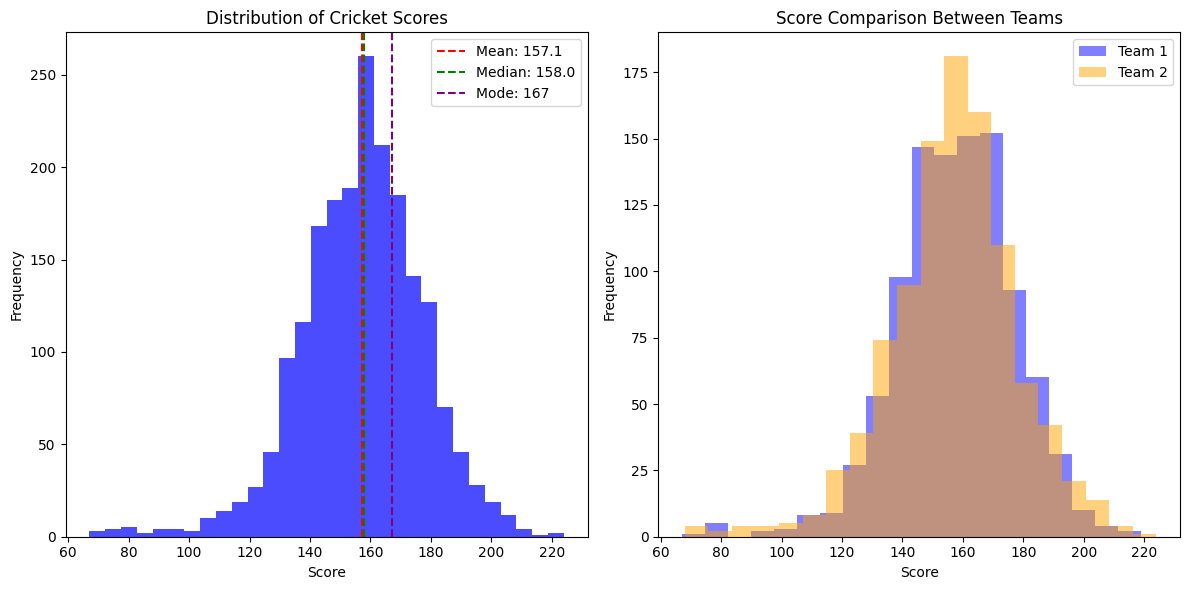

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import statistics

# Your existing setup code
outcome_freq = {
    0: 77945,
    1: 108006,
    2: 18225,
    4: 30744,
    6: 13050,
    'W': 12950
}

total_balls = sum(outcome_freq.values())
outcomes = list(outcome_freq.keys())
probabilities = [freq / total_balls for freq in outcome_freq.values()]

# Verify probabilities sum to 1
assert abs(sum(probabilities) - 1.0) < 1e-10, "Probabilities must sum to 1"

# Function to simulate a single innings
def simulate_innings():
    wickets = 0
    balls = 0
    runs = 0
    while wickets < 10 and balls < 120:
        ball = np.random.choice(outcomes, p=probabilities)
        balls += 1
        if ball == 'W':
            wickets += 1
        else:
            runs += int(ball)
    return runs

# Simulate multiple matches and collect scores
num_matches = 1000  # Increase this number for more simulations
team1_scores = []
team2_scores = []
match_results = []  # Win, loss, or tie

for i in range(num_matches):
    team1_score = simulate_innings()
    team2_score = simulate_innings()
    
    team1_scores.append(team1_score)
    team2_scores.append(team2_score)
    
    if team1_score > team2_score:
        match_results.append("Team 1 Win")
    elif team2_score > team1_score:
        match_results.append("Team 2 Win")
    else:
        match_results.append("Tie")

# Calculate statistics
all_scores = team1_scores + team2_scores

mean_score = np.mean(all_scores)
median_score = np.median(all_scores)
mode_score = statistics.mode(all_scores)
std_dev = np.std(all_scores)

print(f"Number of matches simulated: {num_matches}")
print(f"Mean score: {mean_score:.2f}")
print(f"Median score: {median_score}")
print(f"Mode score: {mode_score}")
print(f"Standard deviation: {std_dev:.2f}")

# Count match results
result_counts = Counter(match_results)
for result, count in result_counts.items():
    print(f"{result}: {count} ({count/num_matches*100:.1f}%)")

# Create a histogram of scores
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(all_scores, bins=30, alpha=0.7, color='blue')
plt.axvline(mean_score, color='red', linestyle='--', label=f'Mean: {mean_score:.1f}')
plt.axvline(median_score, color='green', linestyle='--', label=f'Median: {median_score}')
plt.axvline(mode_score, color='purple', linestyle='--', label=f'Mode: {mode_score}')
plt.title('Distribution of Cricket Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(team1_scores, bins=20, alpha=0.5, color='blue', label='Team 1')
plt.hist(team2_scores, bins=20, alpha=0.5, color='orange', label='Team 2')
plt.title('Score Comparison Between Teams')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()

In [7]:
import random
import numpy as np

class CricketMatchSimulator:
    def __init__(self, team1, team2, overs=20, wickets=10):
        # Team names
        self.team1 = team1
        self.team2 = team2
        
        # Match parameters
        self.total_overs = overs
        self.max_wickets = wickets
        
        # Current state
        self.batting_team = None
        self.bowling_team = None
        self.current_innings = 1
        self.overs_completed = 0
        self.balls_in_over = 0
        self.score = 0
        self.wickets = 0
        self.target = None
        
        # Match stats
        self.match_stats = {
            team1: {"score": 0, "wickets": 0, "overs": 0, "balls": 0},
            team2: {"score": 0, "wickets": 0, "overs": 0, "balls": 0}
        }
        
        # Outcome distribution based on provided frequencies
        self.outcomes = []
        self.probabilities = []
        
        # Provided outcome frequencies
        outcome_freq = {
            0: 77945,
            1: 108006,
            2: 18225,
            4: 30744,
            6: 13050,
            'W': 12950
        }
        
        total_balls = 260920
        
        # Convert frequencies to probabilities
        for outcome, freq in outcome_freq.items():
            self.outcomes.append(outcome)
            self.probabilities.append(freq / total_balls)
            
    def toss(self):
        """Simulate the toss and decide who bats first"""
        toss_winner = random.choice([self.team1, self.team2])
        decision = random.choice(["bat", "bowl"])
        
        if decision == "bat":
            self.batting_team = toss_winner
            self.bowling_team = self.team2 if toss_winner == self.team1 else self.team1
        else:
            self.bowling_team = toss_winner
            self.batting_team = self.team2 if toss_winner == self.team1 else self.team1
            
        print(f"{toss_winner} won the toss and elected to {decision} first")
        print(f"{self.batting_team} will bat first\n")
        
    def simulate_ball(self):
        """Simulate a single ball based on the given distribution"""
        outcome = np.random.choice(self.outcomes, p=self.probabilities)
        
        # Update match state based on outcome
        if outcome == 'W':
            self.wickets += 1
            print(f"WICKET! {self.batting_team} loses their {self.wickets} wicket")
        else:
            # Convert outcome to int before adding to score
            self.score += int(outcome)
            print(f"Ball {self.overs_completed}.{self.balls_in_over+1}: {outcome} runs")
            
        # Update balls count
        self.balls_in_over += 1
        
        # Check if over completed
        if self.balls_in_over == 6:
            self.overs_completed += 1
            self.balls_in_over = 0
            print(f"End of over {self.overs_completed}. Score: {self.score}/{self.wickets}")
            
        return outcome
        
    def is_innings_over(self):
        """Check if the current innings is over"""
        # Innings ends if max overs are bowled or max wickets are lost
        return (self.overs_completed >= self.total_overs) or (self.wickets >= self.max_wickets)
        
    def switch_innings(self):
        """Switch batting and bowling teams for second innings"""
        # Record first innings score
        self.match_stats[self.batting_team]["score"] = self.score
        self.match_stats[self.batting_team]["wickets"] = self.wickets
        self.match_stats[self.batting_team]["overs"] = self.overs_completed
        self.match_stats[self.batting_team]["balls"] = self.balls_in_over
        
        # Set target
        self.target = self.score + 1
        
        # Swap teams
        temp = self.batting_team
        self.batting_team = self.bowling_team
        self.bowling_team = temp
        
        # Reset innings state
        self.current_innings = 2
        self.overs_completed = 0
        self.balls_in_over = 0
        self.score = 0
        self.wickets = 0
        
        print(f"\n--- End of 1st Innings ---")
        print(f"{self.bowling_team} scored {self.match_stats[self.bowling_team]['score']}/{self.match_stats[self.bowling_team]['wickets']} in {self.match_stats[self.bowling_team]['overs']}.{self.match_stats[self.bowling_team]['balls']} overs")
        print(f"{self.batting_team} needs {self.target} runs to win\n")
        
    def is_match_over(self):
        """Check if the match is over in the second innings"""
        if self.current_innings == 1:
            return False
            
        # Match ends if target is achieved
        if self.score >= self.target:
            return True
            
        # Or if all overs are bowled or all wickets are lost
        return self.is_innings_over()
        
    def get_result(self):
        """Determine and return the match result"""
        # Record second innings score
        self.match_stats[self.batting_team]["score"] = self.score
        self.match_stats[self.batting_team]["wickets"] = self.wickets
        self.match_stats[self.batting_team]["overs"] = self.overs_completed
        self.match_stats[self.batting_team]["balls"] = self.balls_in_over
        
        # Determine winner
        if self.score >= self.target:
            winner = self.batting_team
            margin = f"{self.max_wickets - self.wickets} wickets"
        else:
            winner = self.bowling_team
            margin = f"{self.target - self.score - 1} runs"
            
        print(f"\n--- Match Result ---")
        print(f"{self.team1}: {self.match_stats[self.team1]['score']}/{self.match_stats[self.team1]['wickets']} ({self.match_stats[self.team1]['overs']}.{self.match_stats[self.team1]['balls']} overs)")
        print(f"{self.team2}: {self.match_stats[self.team2]['score']}/{self.match_stats[self.team2]['wickets']} ({self.match_stats[self.team2]['overs']}.{self.match_stats[self.team2]['balls']} overs)")
        print(f"{winner} won by {margin}")
        
    def simulate_match(self):
        """Simulate the entire cricket match"""
        # Start with the toss
        self.toss()
        
        print("--- First Innings ---")
        # Simulate first innings
        while not self.is_innings_over():
            self.simulate_ball()
            
        # Switch innings
        self.switch_innings()
        
        print("--- Second Innings ---")
        # Simulate second innings
        while not self.is_match_over():
            self.simulate_ball()
            
        # Display result
        self.get_result()
        

# Run multiple simulations and calculate statistics
if __name__ == "__main__":
    # Number of simulations to run
    num_simulations = 100
    
    # Containers for statistics
    team1_scores = []
    team2_scores = []
    team1_wickets = []
    team2_wickets = []
    match_outcomes = {"Team A": 0, "Team B": 0}
    
    # Run multiple simulations
    print(f"Running {num_simulations} cricket match simulations...")
    
    for i in range(num_simulations):
        print(f"\nSimulation #{i+1}")
        
        # Create new match object
        match = CricketMatchSimulator("Team A", "Team B", overs=20, wickets=10)
        
        # Simulate the match
        match.simulate_match()
        
        # Record statistics
        team1_scores.append(match.match_stats["Team A"]["score"])
        team2_scores.append(match.match_stats["Team B"]["score"])
        team1_wickets.append(match.match_stats["Team A"]["wickets"])
        team2_wickets.append(match.match_stats["Team B"]["wickets"])
        
        # Record winner
        if match.match_stats["Team A"]["score"] > match.match_stats["Team B"]["score"]:
            match_outcomes["Team A"] += 1
        else:
            match_outcomes["Team B"] += 1
    
    # Calculate statistics
    print("\n=== SIMULATION STATISTICS ===")
    
    # Team A stats
    print("\nTeam A Statistics:")
    print(f"Average score: {np.mean(team1_scores):.2f}")
    print(f"Score variance: {np.var(team1_scores):.2f}")
    print(f"Score standard deviation: {np.std(team1_scores):.2f}")
    print(f"Minimum score: {min(team1_scores)}")
    print(f"Maximum score: {max(team1_scores)}")
    print(f"Average wickets lost: {np.mean(team1_wickets):.2f}")
    
    # Team B stats
    print("\nTeam B Statistics:")
    print(f"Average score: {np.mean(team2_scores):.2f}")
    print(f"Score variance: {np.var(team2_scores):.2f}")
    print(f"Score standard deviation: {np.std(team2_scores):.2f}")
    print(f"Minimum score: {min(team2_scores)}")
    print(f"Maximum score: {max(team2_scores)}")
    print(f"Average wickets lost: {np.mean(team2_wickets):.2f}")
    
    # Match outcomes
    print("\nMatch Outcomes:")
    print(f"Team A wins: {match_outcomes['Team A']} ({match_outcomes['Team A']/num_simulations*100:.2f}%)")
    print(f"Team B wins: {match_outcomes['Team B']} ({match_outcomes['Team B']/num_simulations*100:.2f}%)")

Running 100 cricket match simulations...

Simulation #1
Team B won the toss and elected to bat first
Team B will bat first

--- First Innings ---
Ball 0.1: 4 runs
Ball 0.2: 1 runs
Ball 0.3: 0 runs
Ball 0.4: 0 runs
Ball 0.5: 1 runs
Ball 0.6: 1 runs
End of over 1. Score: 7/0
Ball 1.1: 1 runs
Ball 1.2: 1 runs
WICKET! Team B loses their 1 wicket
Ball 1.4: 1 runs
Ball 1.5: 2 runs
Ball 1.6: 1 runs
End of over 2. Score: 13/1
Ball 2.1: 2 runs
Ball 2.2: 2 runs
Ball 2.3: 0 runs
Ball 2.4: 0 runs
Ball 2.5: 1 runs
Ball 2.6: 1 runs
End of over 3. Score: 19/1
WICKET! Team B loses their 2 wicket
Ball 3.2: 0 runs
Ball 3.3: 1 runs
Ball 3.4: 0 runs
Ball 3.5: 2 runs
Ball 3.6: 0 runs
End of over 4. Score: 22/2
Ball 4.1: 1 runs
Ball 4.2: 4 runs
Ball 4.3: 1 runs
Ball 4.4: 1 runs
Ball 4.5: 1 runs
Ball 4.6: 4 runs
End of over 5. Score: 34/2
Ball 5.1: 1 runs
Ball 5.2: 0 runs
Ball 5.3: 0 runs
Ball 5.4: 2 runs
Ball 5.5: 1 runs
Ball 5.6: 1 runs
End of over 6. Score: 39/2
Ball 6.1: 1 runs
Ball 6.2: 6 runs
Ball 6.3:

Matplotlib is building the font cache; this may take a moment.


Running 100 cricket match simulations...

=== SIMULATION STATISTICS ===

Overall Statistics:
Average score: 152.81
Score variance: 339.26
Score standard deviation: 18.42
Minimum score: 83
Maximum score: 204
Average wickets lost: 5.57

Innings Comparison:
First innings average score: 148.94
Second innings average score: 156.68
First innings average wickets: 5.34
Second innings average wickets: 5.79

Match Outcomes:
Team A wins: 50 (50.00%)
Team B wins: 50 (50.00%)


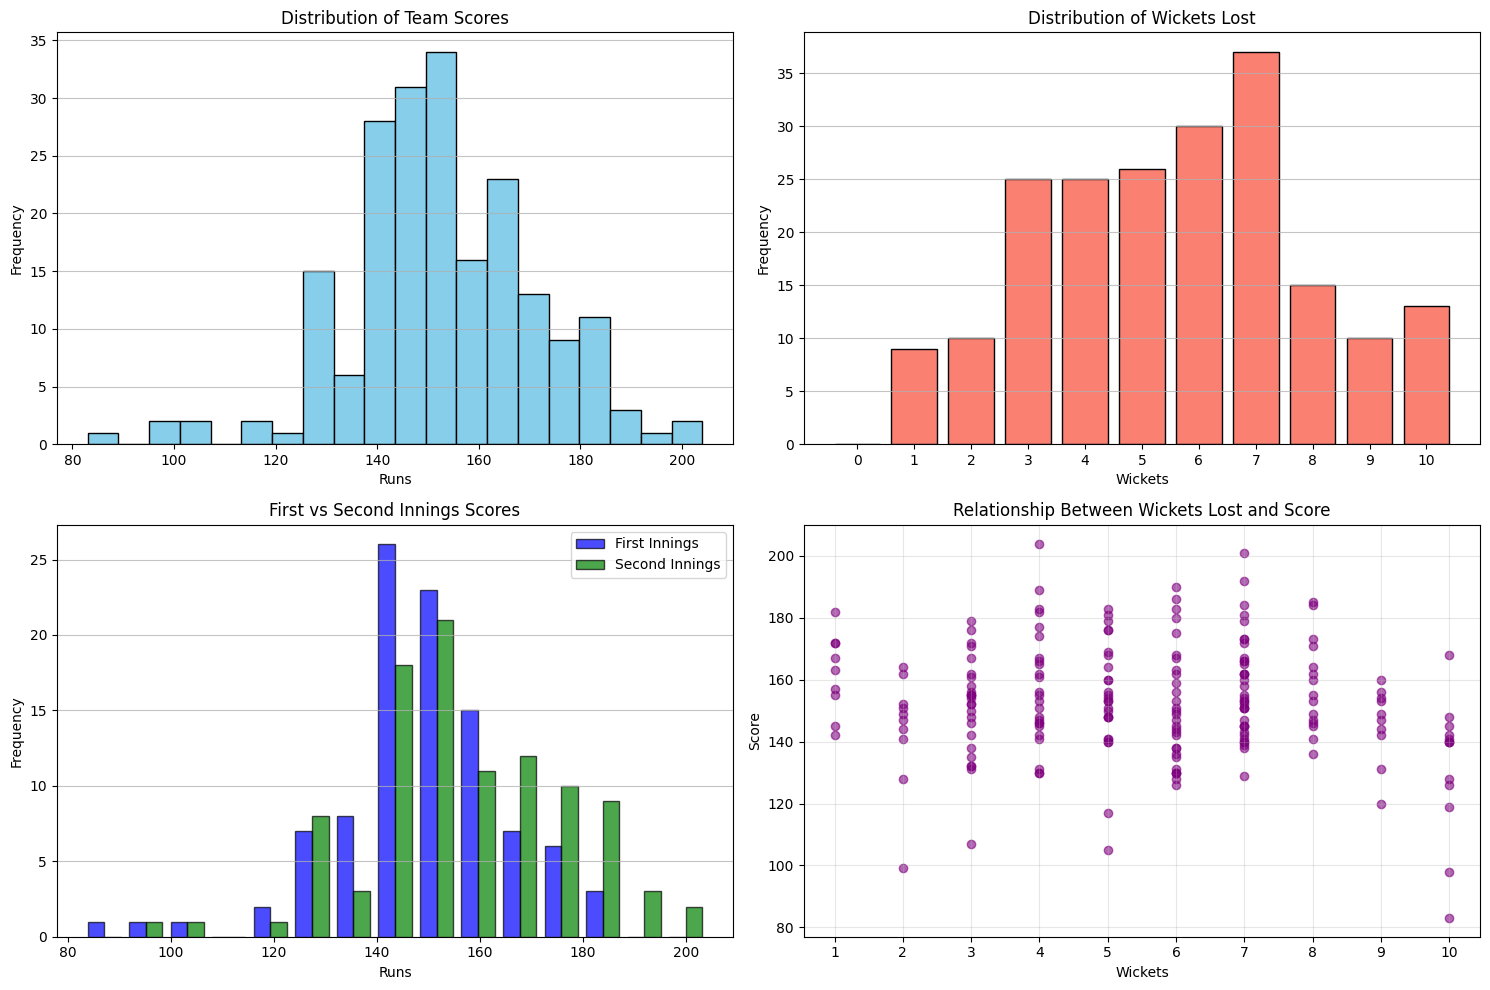

In [10]:
import random
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from collections import Counter

class CricketMatchSimulator:
    def __init__(self, team1, team2, overs=20, wickets=10):
        # Team names
        self.team1 = team1
        self.team2 = team2
        
        # Match parameters
        self.total_overs = overs
        self.max_wickets = wickets
        
        # Current state
        self.batting_team = None
        self.bowling_team = None
        self.current_innings = 1
        self.overs_completed = 0
        self.balls_in_over = 0
        self.score = 0
        self.wickets = 0
        self.target = None
        
        # Match stats
        self.match_stats = {
            team1: {"score": 0, "wickets": 0, "overs": 0, "balls": 0},
            team2: {"score": 0, "wickets": 0, "overs": 0, "balls": 0}
        }
        
        # Outcome distribution based on provided frequencies
        self.outcomes = []
        self.probabilities = []
        
        # Provided outcome frequencies
        outcome_freq = {
            0: 77945,
            1: 108006,
            2: 18225,
            4: 30744,
            6: 13050,
            'W': 12950
        }
        
        total_balls = 260920
        
        # Convert frequencies to probabilities
        for outcome, freq in outcome_freq.items():
            self.outcomes.append(outcome)
            self.probabilities.append(freq / total_balls)
            
    def toss(self):
        """Simulate the toss and decide who bats first"""
        toss_winner = random.choice([self.team1, self.team2])
        decision = random.choice(["bat", "bowl"])
        
        if decision == "bat":
            self.batting_team = toss_winner
            self.bowling_team = self.team2 if toss_winner == self.team1 else self.team1
        else:
            self.bowling_team = toss_winner
            self.batting_team = self.team2 if toss_winner == self.team1 else self.team1
        
    def simulate_ball(self):
        """Simulate a single ball based on the given distribution"""
        outcome = np.random.choice(self.outcomes, p=self.probabilities)
        
        # Update match state based on outcome
        if outcome == 'W':
            self.wickets += 1
        else:
            # Convert outcome to int before adding to score
            self.score += int(outcome)
            
        # Update balls count
        self.balls_in_over += 1
        
        # Check if over completed
        if self.balls_in_over == 6:
            self.overs_completed += 1
            self.balls_in_over = 0
            
        return outcome
        
    def is_innings_over(self):
        """Check if the current innings is over"""
        # Innings ends if max overs are bowled or max wickets are lost
        return (self.overs_completed >= self.total_overs) or (self.wickets >= self.max_wickets)
        
    def switch_innings(self):
        """Switch batting and bowling teams for second innings"""
        # Record first innings score
        self.match_stats[self.batting_team]["score"] = self.score
        self.match_stats[self.batting_team]["wickets"] = self.wickets
        self.match_stats[self.batting_team]["overs"] = self.overs_completed
        self.match_stats[self.batting_team]["balls"] = self.balls_in_over
        
        # Set target
        self.target = self.score + 1
        
        # Swap teams
        temp = self.batting_team
        self.batting_team = self.bowling_team
        self.bowling_team = temp
        
        # Reset innings state
        self.current_innings = 2
        self.overs_completed = 0
        self.balls_in_over = 0
        self.score = 0
        self.wickets = 0
        
    def is_match_over(self):
        """Check if the match is over in the second innings"""
        if self.current_innings == 1:
            return False
            
        # Match ends if target is achieved
        if self.score >= self.target:
            return True
            
        # Or if all overs are bowled or all wickets are lost
        return self.is_innings_over()
        
    def get_result(self):
        """Determine and return the match result"""
        # Record second innings score
        self.match_stats[self.batting_team]["score"] = self.score
        self.match_stats[self.batting_team]["wickets"] = self.wickets
        self.match_stats[self.batting_team]["overs"] = self.overs_completed
        self.match_stats[self.batting_team]["balls"] = self.balls_in_over
        
        # Determine winner
        if self.score >= self.target:
            winner = self.batting_team
        else:
            winner = self.bowling_team
            
        return winner
        
    def simulate_match(self):
        """Simulate the entire cricket match"""
        # Start with the toss
        self.toss()
        
        # Simulate first innings
        while not self.is_innings_over():
            self.simulate_ball()
            
        # Switch innings
        self.switch_innings()
        
        # Simulate second innings
        while not self.is_match_over():
            self.simulate_ball()
            
        # Return the winner
        return self.get_result()
        

# Run multiple simulations and calculate statistics
if __name__ == "__main__":
    # Number of simulations to run
    num_simulations = 100
    
    # Containers for statistics
    team1_scores = []
    team2_scores = []
    team1_wickets = []
    team2_wickets = []
    match_outcomes = {"Team A": 0, "Team B": 0}
    first_innings_scores = []
    second_innings_scores = []
    first_innings_wickets = []
    second_innings_wickets = []
    all_scores = []
    all_wickets = []
    
    # Run multiple simulations
    print(f"Running {num_simulations} cricket match simulations...")
    
    for i in range(num_simulations):
        # Create new match object
        match = CricketMatchSimulator("Team A", "Team B", overs=20, wickets=10)
        
        # Simulate the match
        winner = match.simulate_match()
        
        # Record statistics
        team1_scores.append(match.match_stats["Team A"]["score"])
        team2_scores.append(match.match_stats["Team B"]["score"])
        team1_wickets.append(match.match_stats["Team A"]["wickets"])
        team2_wickets.append(match.match_stats["Team B"]["wickets"])
        
        # Add to all scores and wickets lists
        all_scores.extend([match.match_stats["Team A"]["score"], match.match_stats["Team B"]["score"]])
        all_wickets.extend([match.match_stats["Team A"]["wickets"], match.match_stats["Team B"]["wickets"]])
        
        # Record match outcome
        if winner == "Team A":
            match_outcomes["Team A"] += 1
        else:
            match_outcomes["Team B"] += 1
            
        # Determine which was first innings and second innings
        if match.team1 == match.bowling_team:  # Team B batted first
            first_innings_scores.append(match.match_stats["Team B"]["score"])
            second_innings_scores.append(match.match_stats["Team A"]["score"])
            first_innings_wickets.append(match.match_stats["Team B"]["wickets"])
            second_innings_wickets.append(match.match_stats["Team A"]["wickets"])
        else:  # Team A batted first
            first_innings_scores.append(match.match_stats["Team A"]["score"])
            second_innings_scores.append(match.match_stats["Team B"]["score"])
            first_innings_wickets.append(match.match_stats["Team A"]["wickets"])
            second_innings_wickets.append(match.match_stats["Team B"]["wickets"])
    
    # Calculate statistics
    print("\n=== SIMULATION STATISTICS ===")
    
    # Overall stats
    print("\nOverall Statistics:")
    print(f"Average score: {np.mean(all_scores):.2f}")
    print(f"Score variance: {np.var(all_scores):.2f}")
    print(f"Score standard deviation: {np.std(all_scores):.2f}")
    print(f"Minimum score: {min(all_scores)}")
    print(f"Maximum score: {max(all_scores)}")
    print(f"Average wickets lost: {np.mean(all_wickets):.2f}")
    
    # Innings comparison
    print("\nInnings Comparison:")
    print(f"First innings average score: {np.mean(first_innings_scores):.2f}")
    print(f"Second innings average score: {np.mean(second_innings_scores):.2f}")
    print(f"First innings average wickets: {np.mean(first_innings_wickets):.2f}")
    print(f"Second innings average wickets: {np.mean(second_innings_wickets):.2f}")
    
    # Match outcomes
    print("\nMatch Outcomes:")
    print(f"Team A wins: {match_outcomes['Team A']} ({match_outcomes['Team A']/num_simulations*100:.2f}%)")
    print(f"Team B wins: {match_outcomes['Team B']} ({match_outcomes['Team B']/num_simulations*100:.2f}%)")
    
    # Create visualizations
    plt.figure(figsize=(15, 10))
    
    # Histogram of scores
    plt.subplot(2, 2, 1)
    plt.hist(all_scores, bins=20, color='skyblue', edgecolor='black')
    plt.title('Distribution of Team Scores')
    plt.xlabel('Runs')
    plt.ylabel('Frequency')
    plt.grid(axis='y', alpha=0.75)
    
    # Histogram of wickets
    plt.subplot(2, 2, 2)
    wicket_counts = Counter(all_wickets)
    wickets = list(range(11))  # 0-10 wickets
    frequencies = [wicket_counts.get(w, 0) for w in wickets]
    plt.bar(wickets, frequencies, color='salmon', edgecolor='black')
    plt.title('Distribution of Wickets Lost')
    plt.xlabel('Wickets')
    plt.ylabel('Frequency')
    plt.xticks(wickets)
    plt.grid(axis='y', alpha=0.75)
    
    # Comparison of 1st vs 2nd innings scores
    plt.subplot(2, 2, 3)
    plt.hist([first_innings_scores, second_innings_scores], bins=15, 
             label=['First Innings', 'Second Innings'], color=['blue', 'green'],
             alpha=0.7, edgecolor='black')
    plt.title('First vs Second Innings Scores')
    plt.xlabel('Runs')
    plt.ylabel('Frequency')
    plt.legend()
    plt.grid(axis='y', alpha=0.75)
    
    # Scatter plot of score vs wickets
    plt.subplot(2, 2, 4)
    plt.scatter(all_wickets, all_scores, alpha=0.6, c='purple')
    plt.title('Relationship Between Wickets Lost and Score')
    plt.xlabel('Wickets')
    plt.ylabel('Score')
    plt.grid(True, alpha=0.3)
    plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
    
    plt.tight_layout()
    plt.show()

In [23]:
import numpy as np

outcome_freq = {
            0: 77945,
            1: 108006,
            2: 18225,
            4: 30744,
            6: 13050,
            'W': 12950
        }
        
total_balls = 260920
outcomes =[]
probabilities = []
        # Convert frequencies to probabilities
for outcome, freq in outcome_freq.items():
    outcomes.append(outcome)
    probabilities.append(freq / total_balls)

#print(probabilities)
# print ((outcomes))
# print(outcomes [5] =='W')
# for i in outcomes:
#     print (type(i))

num_matches = 1
for i in range(num_matches):
    for j in range(2):
        wickets = 0
        balls = 0
        runs = 0
        while wickets <10 and balls <120:
            #print(runs)
            ball = np.random.choice(outcomes, p=probabilities)
            #print(f"ball: {ball}")
            balls+=1
            if ball == 'W':
                wickets +=1
            else:
                runs += int(ball)
            print(f"Ball {balls}: {ball}, score: {runs}/{wickets}")



Ball 1: 4, score: 4/0
Ball 2: 1, score: 5/0
Ball 3: 0, score: 5/0
Ball 4: 1, score: 6/0
Ball 5: 1, score: 7/0
Ball 6: 1, score: 8/0
Ball 7: 0, score: 8/0
Ball 8: 0, score: 8/0
Ball 9: 1, score: 9/0
Ball 10: 1, score: 10/0
Ball 11: 0, score: 10/0
Ball 12: 4, score: 14/0
Ball 13: 4, score: 18/0
Ball 14: 1, score: 19/0
Ball 15: 4, score: 23/0
Ball 16: 4, score: 27/0
Ball 17: 6, score: 33/0
Ball 18: W, score: 33/1
Ball 19: 1, score: 34/1
Ball 20: 0, score: 34/1
Ball 21: 0, score: 34/1
Ball 22: 0, score: 34/1
Ball 23: 1, score: 35/1
Ball 24: 4, score: 39/1
Ball 25: 4, score: 43/1
Ball 26: W, score: 43/2
Ball 27: 2, score: 45/2
Ball 28: 0, score: 45/2
Ball 29: 0, score: 45/2
Ball 30: 4, score: 49/2
Ball 31: 0, score: 49/2
Ball 32: 2, score: 51/2
Ball 33: 1, score: 52/2
Ball 34: 4, score: 56/2
Ball 35: 1, score: 57/2
Ball 36: 2, score: 59/2
Ball 37: 1, score: 60/2
Ball 38: W, score: 60/3
Ball 39: 1, score: 61/3
Ball 40: 0, score: 61/3
Ball 41: 2, score: 63/3
Ball 42: 0, score: 63/3
Ball 43: 1